****Cafelura - Analisando as vendas****

In [23]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
cafelura = pd.read_csv('./data/cafelura.csv', sep=',')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [25]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [26]:
print("Quantidade de linhas e coluna: {}".format(cafelura.shape))
print("Quantidade de dados nulos: {}".format(cafelura.isna().sum().sum()))

Quantidade de linhas e coluna: (24, 2)
Quantidade de dados nulos: 0


In [27]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

**Vendas**

In [28]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data= dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax=ax

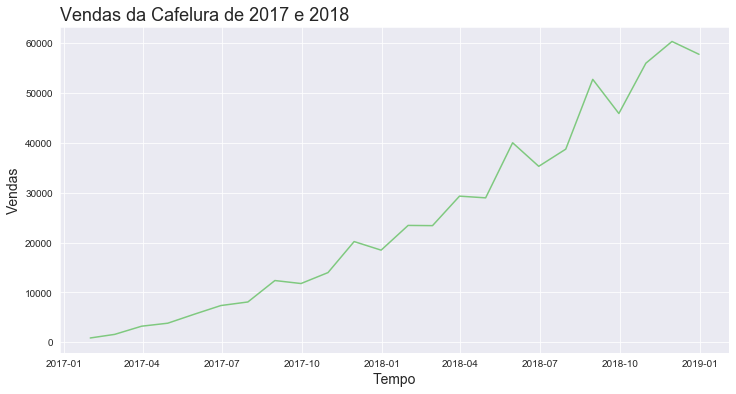

In [29]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

**Normalização das vendas**

In [30]:
quantidade_de_dias_fds = pd.read_csv('./data/dias_final_de_semana.csv', sep=',')
quantidade_de_dias_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [31]:
quantidade_de_dias_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [32]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_fds['quantidade_de_dias'].values

In [33]:
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


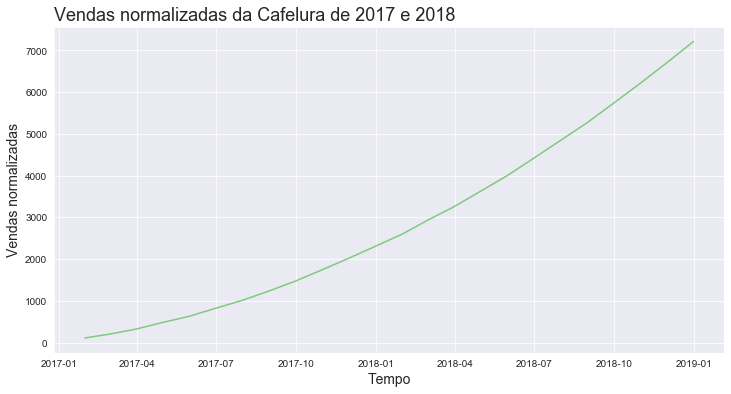

In [34]:
plotar('Vendas normalizadas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas normalizadas','mes', 'vendas_normalizadas', cafelura)

*Jundatando os dois gráficos*

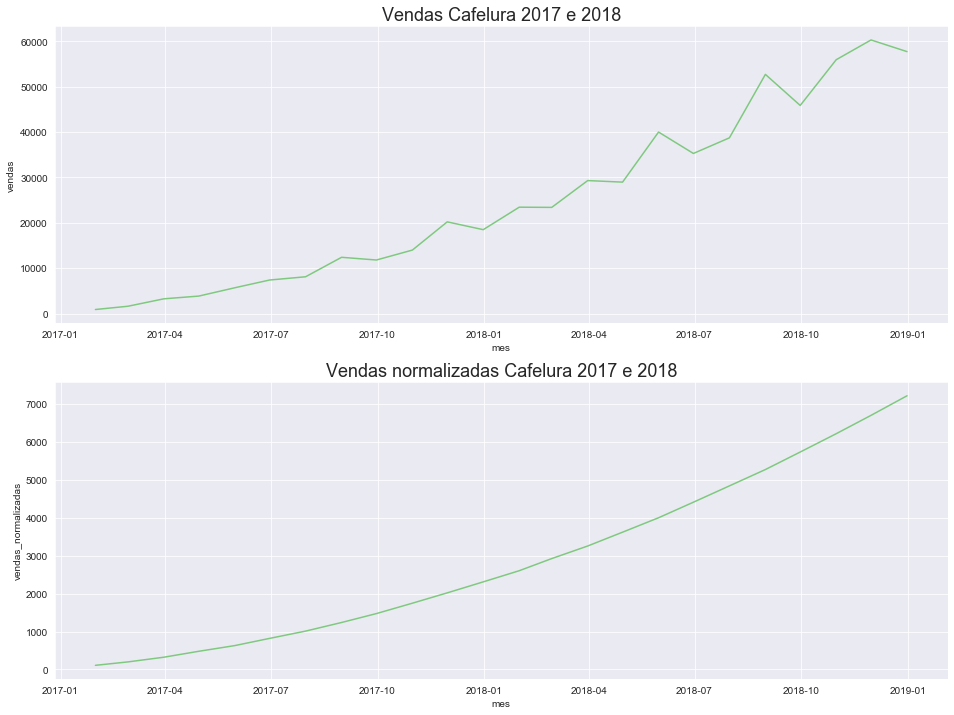

In [35]:
plt.figure(figsize=(16,12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes',y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
